In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation,Conv2D,MaxPool2D,Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from matplotlib import pyplot
import numpy as np

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
trainX = np.expand_dims(trainX, axis=-1)
trainX = trainX.astype("float32") / 255.0

trainy=to_categorical(trainy)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# define model with batch normalisation
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, epochs=2, verbose=1)
# define model without batch normalisation
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1)))
model_1.add(MaxPool2D(2,2))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
opt1 = SGD(lr=0.001)
model_1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])
# fit model
history1 = model_1.fit(trainX, trainy, epochs=2, verbose=1)

Epoch 1/2
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 2/2
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0241 - accuracy: 0.9929
Epoch 1/2
1875/1875 [==============================] - 55s 29ms/step - loss: 2.0726 - accuracy: 0.4047
Epoch 2/2
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4827 - accuracy: 0.8633


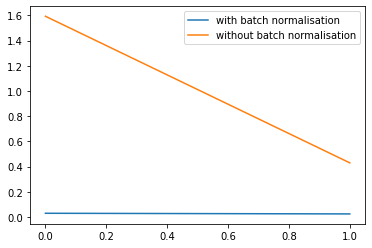

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='with batch normalisation')
pyplot.plot(history1.history['loss'], label='without batch normalisation')
pyplot.legend()
pyplot.show()